293.65


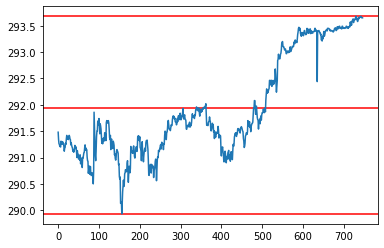

https://api.tdameritrade.com/v1/marketdata/SPY/pricehistory


In [17]:
import requests
import pandas as pd
import time
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

endpoint = r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format('SPY')

def getEndPoint(ticker : str) -> str:
    ''' 0: a ticker symbol for stocks
        1: a request link with the ticker symbol inside of it
    '''
    return r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format(ticker.upper().strip())

def getCurrentTime() -> str:
    """
    0: None
    1: The current time in a 13-Digit epoch string
    
    """
    return lambda: int(round(time.time() * 1000))

# def DatetoEpoch(d: str ) ->str:
#     """
#     0:
#     1:
#     """
#     
#     return int(round(datetime.datetime(* [int(i) for i in d.split(("-"))] ).timestamp()))

def DatetoEpoch(d):
    return int(round(datetime.fromisoformat(d).timestamp() * 1000))

def EpochtoDate(d):
    """
    0: epoch with 13-digit
    1:
    """
    return datetime.fromtimestamp((d/1000)).strftime('%Y-%m-%d %H:%M:%S')

def GetAPIKey(path):
    """source: https://www.geeksforgeeks.org/file-handling-python/
    0: the path of the file containing the API KEY
    1: API in a string
    
    """
    return open(path, 'r').read()



#This is an example for how to use keyword arguments for functions
# def test (*,keyword,cool):
#     return f'{keyword} is {cool}'



def setPayload(*, periodType, frequencyType, frequency, period,
               endDate, startDate, needExtendedHoursDate, apikey):
    payload = {
    'apikey' : apikey,
    'periodType' : periodType,
    'frequencyType': frequencyType,
    'frequency': frequency,
    'period':period,
    'endDate': endDate,
    'startDate': startDate,
    'needExtendedHoursDate': needExtendedHoursDate
    }
    return payload

    
    
    
    


if __name__ == "__main__":


    key = GetAPIKey('APIKEY.txt')
    start = DatetoEpoch('2020-05-08 09:30:00.000')
    end = getCurrentTime()()
    
    
    #Turn this into a method
    #keyword arguments
    payload = {
    'apikey' : key,
    'periodType' : 'day',
    'frequencyType': 'minute',
    'frequency': '1',
    'period':'2',
    'endDate': end,
    'startDate': start,
    'needExtendedHoursDate': 'false'}
    
    
    #make a request
    content = requests.get(url = getEndPoint("SPY"), params = payload)
    
    #convert it to a dictionary 
    data = content.json()

    mainData = data["candles"]
# # dataKeys = data["candles"][0].keys()
    #make a method to better orgnaize the data
    chart = pd.DataFrame(mainData)
    
    """
    focus on how to use matplotlib
    object: Plot The graph with the mean line
    """
    
    #(chart[["open"]], chart["open"].mean()).plot()
    
    meanLine = chart["open"].mean()
    maxLine = chart["open"].max()
    minLine = chart["open"].min()
    
    ax = plt.subplot()
    print(chart["open"].get(len(chart["close"])-1))
    ax.axhline(y=meanLine, xmin=0.0, xmax=1.0, color='r')
    ax.axhline(y=maxLine, xmin=0.0, xmax=1.0, color='r')
    ax.axhline(y=minLine, xmin=0.0, xmax=1.0, color='r')
    
    plt.plot(chart["open"])
    plt.show()
    

    